# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

In [5]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


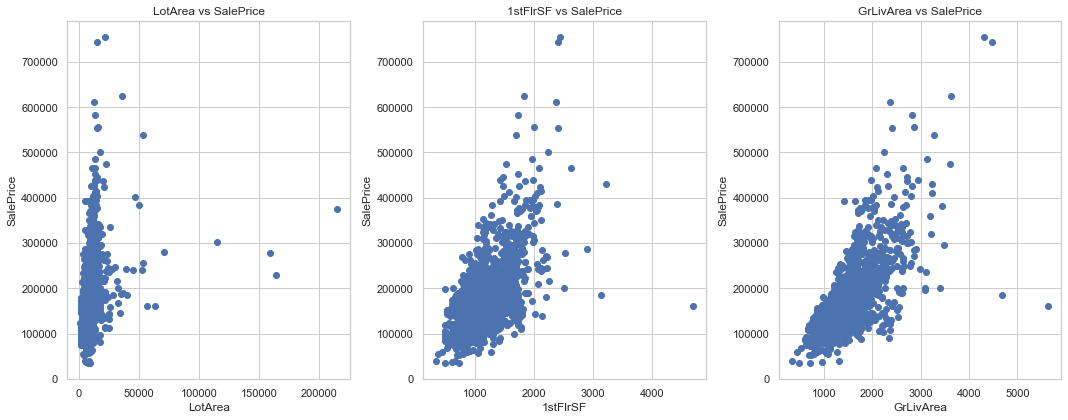

In [12]:
# Visualizing the relationship between the predictor and target variables 
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows= 1, figsize=(15, 6))

ax1.scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
ax1.set_title('LotArea vs SalePrice')
ax1.set_xlabel('LotArea')
ax1.set_ylabel('SalePrice')

ax2.scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
ax2.set_title('1stFlrSF vs SalePrice')
ax2.set_xlabel('1stFlrSF')
ax2.set_ylabel('SalePrice')

ax3.scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
ax3.set_title('GrLivArea vs SalePrice')
ax3.set_xlabel('GrLivArea')
ax3.set_ylabel('SalePrice')

plt.tight_layout()
plt.show();


In [ ]:
# Your written answer here - do these seem like good candidates for linear regression?

- All 3 scatter plots show a positive linear relationship between the predictor variables (LotArea, 1stFlrSF, GrLivArea) and the target variable (SalePrice)

In [15]:
# Create a correlation matrix
ames_subset.corr()

,LotArea,1stFlrSF,GrLivArea,SalePrice
LotArea,1.000000,0.299475,0.263116,0.263843
1stFlrSF,0.299475,1.000000,0.566024,0.605852
GrLivArea,0.263116,0.566024,1.000000,0.708624
SalePrice,0.263843,0.605852,0.708624,1.000000


## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [16]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X_baseline = ames_subset['LotArea'].copy()

In [18]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(X_baseline)).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.12e-24
Time:                        22:04:35   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

In [ ]:
# Your written answer here - interpret model results 

- The regression model is statistically significant with a high F-score and low p-value
- The R-squared of the regression model is 0.07 which indicates that the model only explains 7% of the model variance
- The predictor variable (LotArea) has a very low p-value and a positive coefficient - this means that the relationship is statistically significant and that the SalePrice will increase as LotArea increases

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [19]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']].copy()

In [20]:
# Your code here - fit model and display results
multiple_model = sm.OLS(y, sm.add_constant(X)).fit()
print(multiple_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.57e-262
Time:                        22:12:42   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

- The model with multiple predictors is also statistically significant with a very high F-score and a very small p-value
- The model's adjusted R-squared is 0.564, meaning the model currently explains 56.4% of the model variance - which is a big jump from 7%
- Of the three predictors (LotArea, 1stFlrSF, GrLivArea), only two are statistically significant (1stFlrSF, GrLivArea)) at the 5% significance level - LotArea can be safely dropped from the model without losing much predictive power

In [21]:
# Drop LotArea from the model and fit again
X_adjusted = ames_subset[['1stFlrSF', 'GrLivArea']].copy()
multiple_model_adjusted = sm.OLS(y, sm.add_constant(X_adjusted)).fit()
print(multiple_model_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     941.7
Date:                Wed, 14 May 2025   Prob (F-statistic):          3.05e-263
Time:                        22:17:25   Log-Likelihood:                -17938.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1457   BIC:                         3.590e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.434e+04   4780.943     -3.000      0.0

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

In [23]:
# Your code here - create partial regression plots for each predictor
import statsmodels.graphics.api as smg


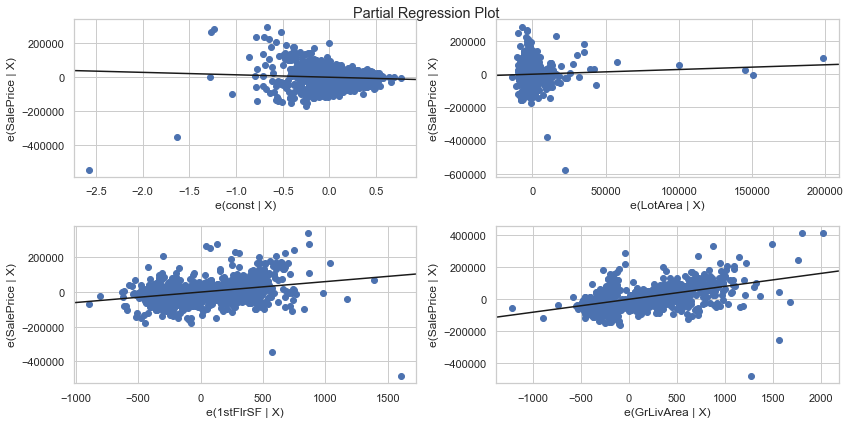

In [32]:
fig = plt.figure(figsize=(12, 6))
smg.plot_partregress_grid(multiple_model, fig=fig)
plt.show();

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

- The partial regression plots show that all predictors have a positive linear relationship with the target variable (SalePrice)
- This result confirms our observations based on looking at the scatter plots for each predictor in the first step

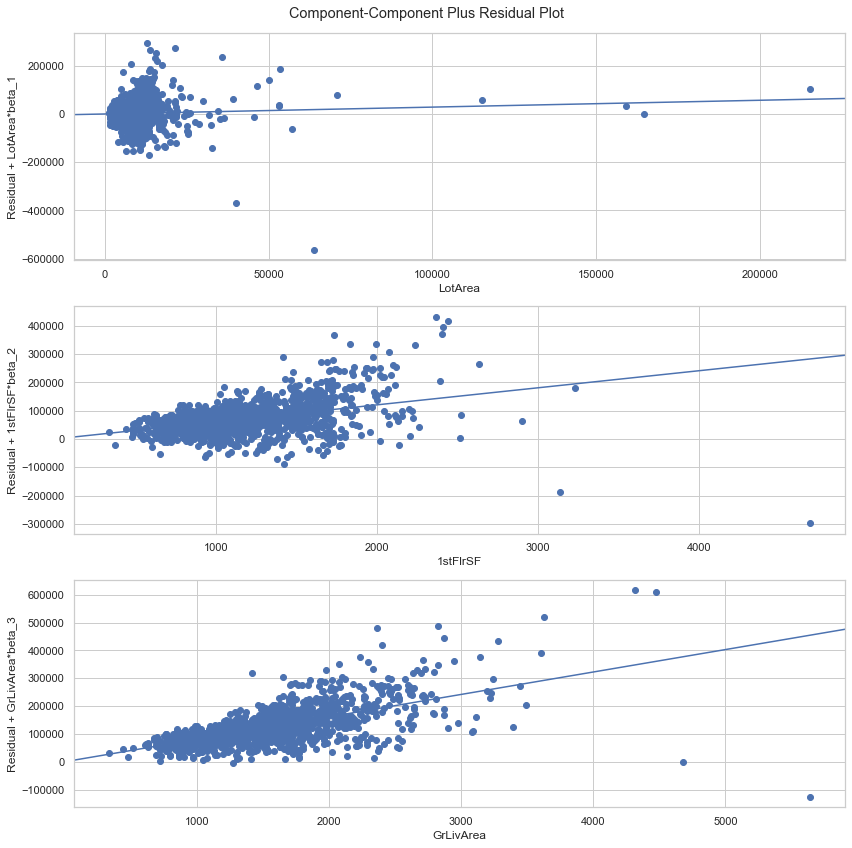

In [31]:
# Generate a CCPR plot for the model with all three predictors
fig = plt.figure(figsize=(12, 12))
smg.plot_ccpr_grid(multiple_model, grid=(3,1), fig=fig)
plt.show(); 

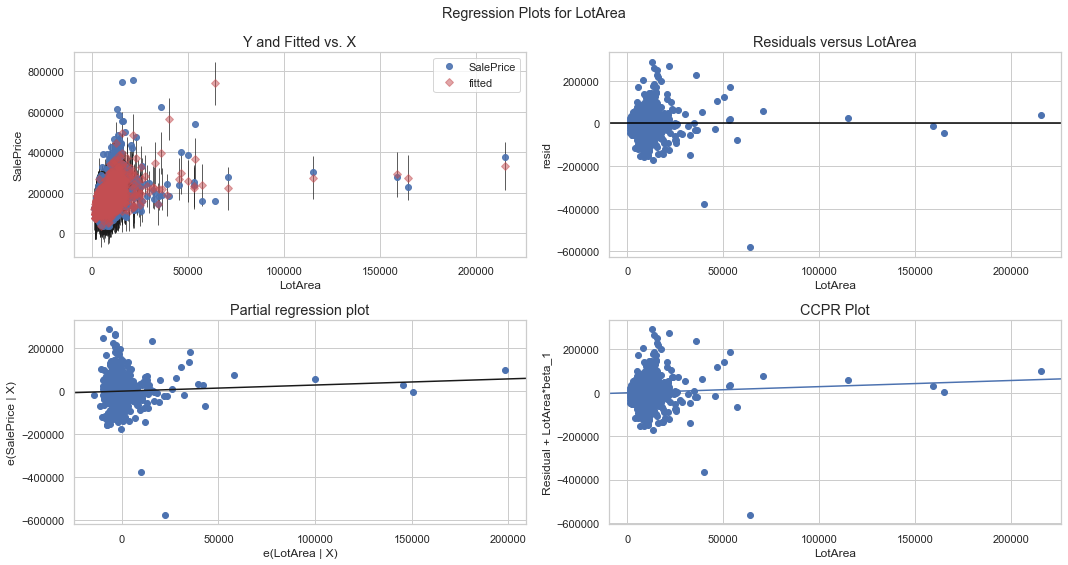

In [ ]:
# Generate the 4 evalation plots for each predictor
# LotArea
fig = plt.figure(figsize=(15, 8))
sm.graphics.plot_regress_exog(multiple_model, 'LotArea', fig=fig)
plt.show();

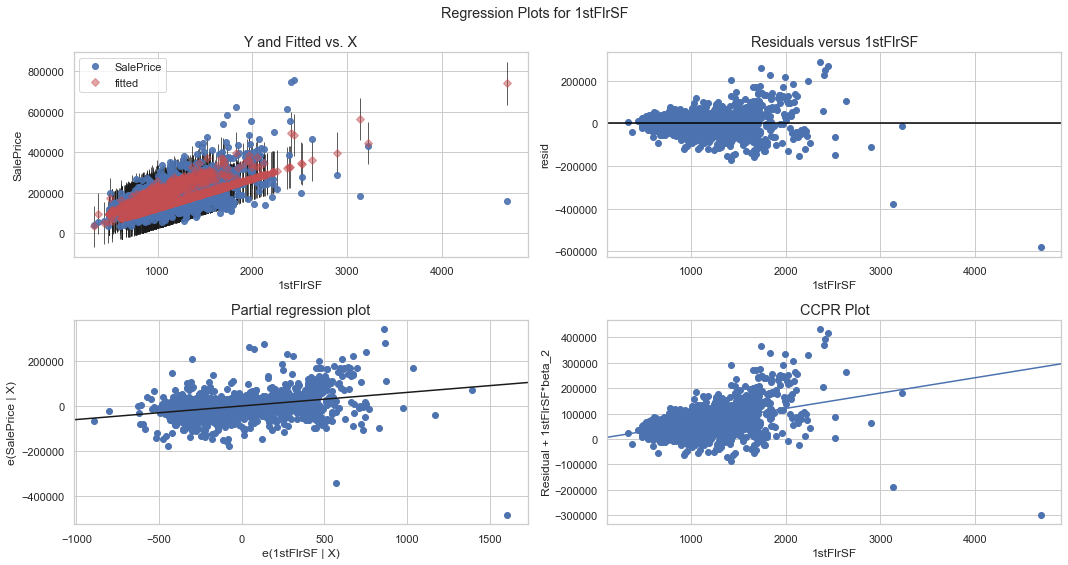

In [34]:
# 1stFlrSF
fig = plt.figure(figsize=(15, 8))
sm.graphics.plot_regress_exog(multiple_model, '1stFlrSF', fig=fig)
plt.show();

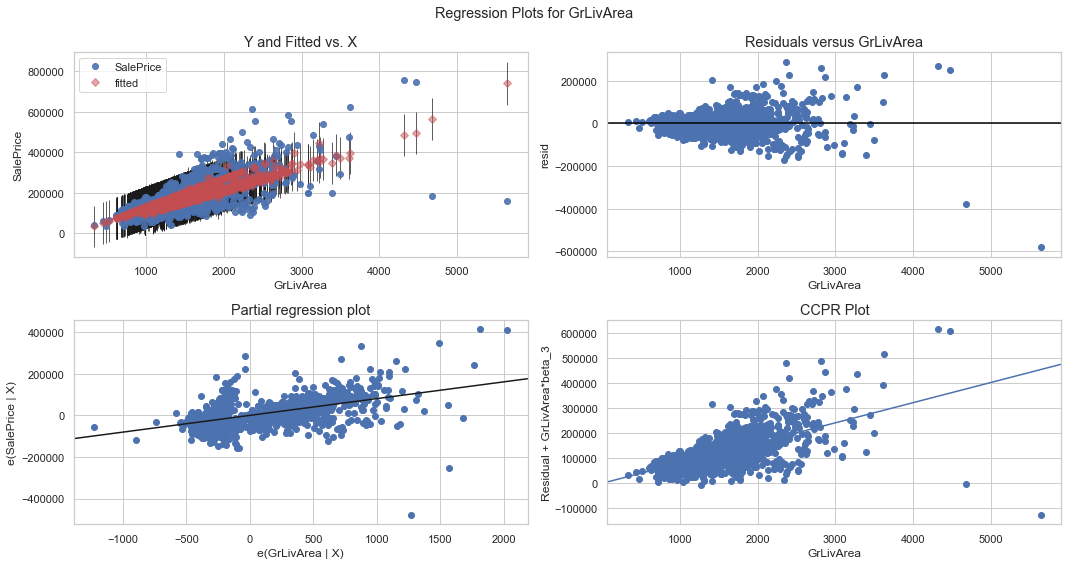

In [35]:
#GrLivArea
fig= plt.figure(figsize=(15, 8))
sm.graphics.plot_regress_exog(multiple_model, 'GrLivArea', fig=fig)
plt.show();

#### LotArea (log-transformed) vs SalePrice 

In [98]:
import numpy as np

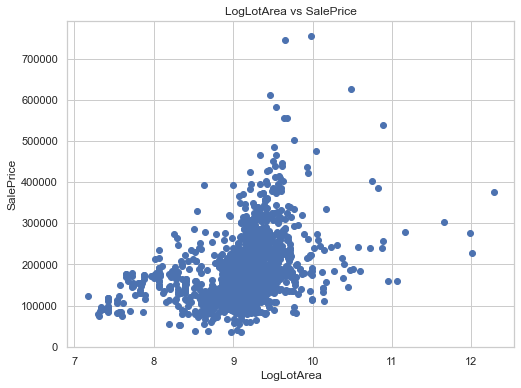

In [99]:
# log-scale LotArea then refit and replot
ames['log_LotArea'] = np.log(ames['LotArea'])

# Create a new subset, 
ames_subset2 = ames[['LogLotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
X_baseline2 = ames_subset2['LogLotArea'].copy()
y2 = ames_subset2['SalePrice']

# Create a Scatter plot of the log-transformed LotArea vs SalePrice
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(ames_subset2['LogLotArea'], ames_subset2['SalePrice'])
ax.set_title('LogLotArea vs SalePrice')
ax.set_xlabel('LogLotArea')
ax.set_ylabel('SalePrice')
plt.show();

In [100]:
# Fit a baseline model with the log-transformed LotArea
baseline_model2 = sm.OLS(y2, sm.add_constant(X_baseline2)).fit()
print(baseline_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 15 May 2025   Prob (F-statistic):           8.36e-54
Time:                        19:38:47   Log-Likelihood:                -18425.
No. Observations:                1460   AIC:                         3.685e+04
Df Residuals:                    1458   BIC:                         3.686e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.625e+05   3.38e+04    -10.723      0.0

In [101]:
# Fit a multiple regression model with the log-transformed LotArea
X_2 = ames_subset2[['LogLotArea', '1stFlrSF', 'GrLivArea']].copy()
multiple_model2 = sm.OLS(y2, sm.add_constant(X_2)).fit()
print(multiple_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     633.4
Date:                Thu, 15 May 2025   Prob (F-statistic):          2.13e-263
Time:                        19:38:47   Log-Likelihood:                -17934.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.43e+04   2.54e+04     -3.313      0.0

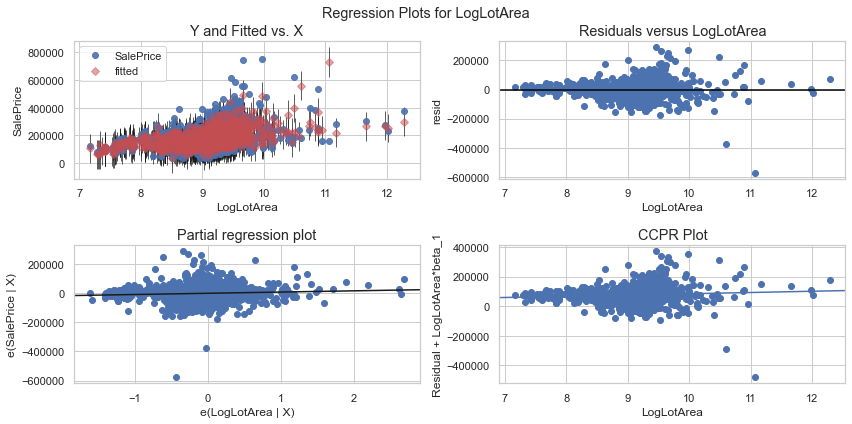

In [102]:
# Plot the regression plots for the log-transformed LotArea
fig = plt.figure(figsize=(12, 6))
smg.plot_regress_exog(multiple_model2, 'LogLotArea', fig=fig)
plt.show();

#### Visualize the distribution of predictors in my dataframe

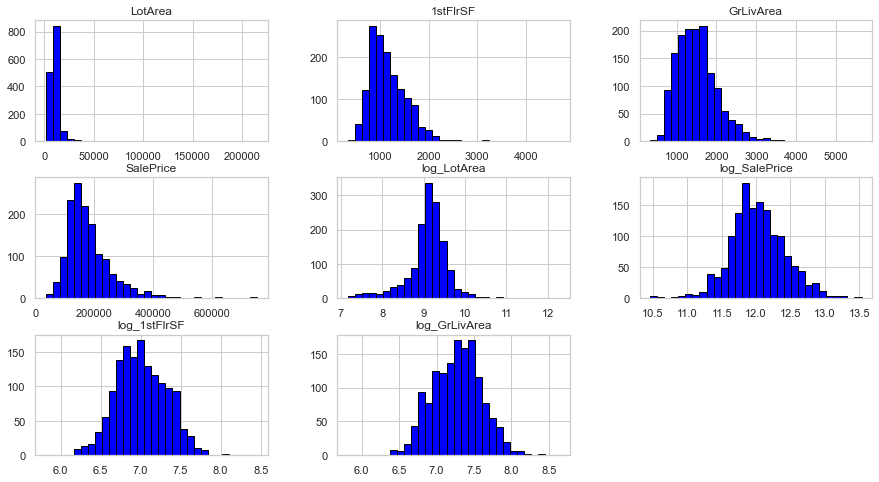

In [103]:
ames_subset.hist(bins=30, figsize=(15, 8), color='blue', layout=(3,3), edgecolor='black');

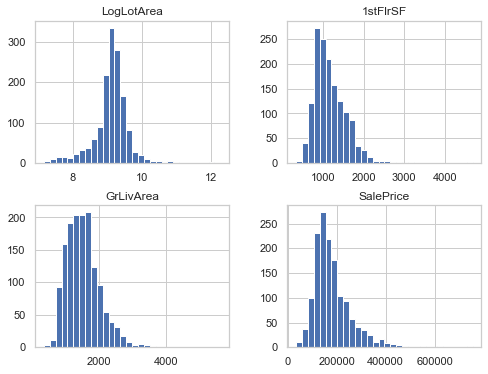

In [104]:
ames_subset2.hist(bins=30, figsize=(8, 6));

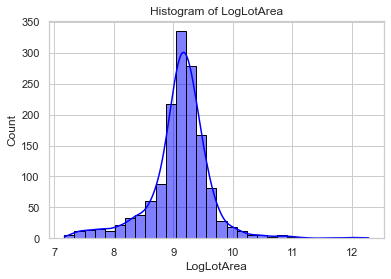

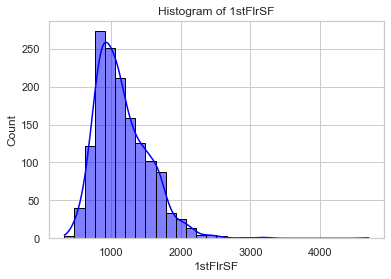

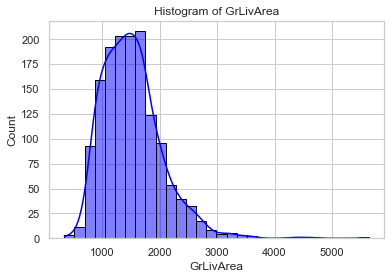

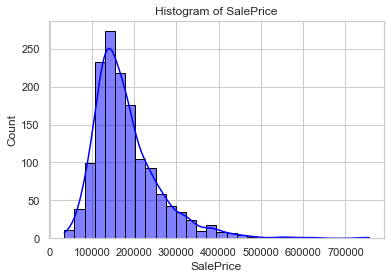

In [105]:
for col in ames_subset2.columns:
    sns.histplot(ames_subset2[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.show();

#### Quantify Skewness programmatically

In [106]:
from scipy.stats import skew

skewed = ames_subset.apply(skew).sort_values(ascending=False)
print(skewed)

LotArea          12.195142
SalePrice         1.880941
1stFlrSF          1.375342
GrLivArea         1.365156
log_SalePrice     0.121222
log_1stFlrSF      0.080032
log_GrLivArea    -0.006134
log_LotArea      -0.137263
dtype: float64


#### Log-transform candidates

In [107]:
for col in skewed[skewed > 1].index:
    ames_subset[f'log_{col}'] = np.log1p(ames_subset[col])

ames_subset.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice,log_LotArea,log_SalePrice,log_1stFlrSF,log_GrLivArea
Id,,,,,,,,
1,8450,856,1710,208500,9.042040,12.247699,6.753438,7.444833
2,9600,1262,1262,181500,9.169623,12.109016,7.141245,7.141245
3,11250,920,1786,223500,9.328212,12.317171,6.825460,7.488294
4,9550,961,1717,140000,9.164401,11.849405,6.869014,7.448916
5,14260,1145,2198,250000,9.565284,12.429220,7.044033,7.695758


In [108]:
# refit the model with the log-transformed variables
X_log = ames_subset[['log_LotArea', 'log_1stFlrSF', 'log_GrLivArea']].copy()
y_log = ames_subset['log_SalePrice'].copy()

multiple_model_log = sm.OLS(y_log, sm.add_constant(X_log)).fit()
print(multiple_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     723.5
Date:                Thu, 15 May 2025   Prob (F-statistic):          6.96e-288
Time:                        19:39:16   Log-Likelihood:                -65.164
No. Observations:                1460   AIC:                             138.3
Df Residuals:                    1456   BIC:                             159.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3259      0.171     25.316

#### Adding Interaction terms - `GrLivArea` and `1stFlrSF`

In [ ]:
# Add new variables to the dataset
ames['LotArea_sq'] = ames['LotArea'] ** 2
ames['GrLivArea_sq'] = ames['GrLivArea'] ** 2
ames['1stFlrSF_sq'] = ames['1stFlrSF'] ** 2
ames['GrLivArea_1stFlrSF'] = ames['GrLivArea'] * ames['1stFlrSF']
ames['log_GrLivArea'] = np.log1p(ames['GrLivArea'])
ames['log_1stFlrSF'] = np.log1p(ames['1stFlrSF'])
ames['log_GrLivArea_sq'] = ames['log_GrLivArea'] ** 2
ames['log_1stFlrSF_sq'] = ames['log_1stFlrSF'] ** 2
ames['log_GrLivArea_1stFlrSF'] = ames['log_GrLivArea'] * ames['log_1stFlrSF']

ames_subset3 = ames[['SalePrice',
                     'LotArea', 
                     '1stFlrSF', 
                     'GrLivArea',
                     'LotArea_sq',
                     '1stFlrSF_sq',
                     'GrLivArea_sq',
                     'log_LotArea',
                     'log_GrLivArea',
                     'log_1stFlrSF', 
                     'log_GrLivArea_sq',
                     'log_1stFlrSF_sq', 
                     'log_GrLivArea_1stFlrSF',
                     'GrLivArea_1stFlrSF']].copy()

In [121]:
# Fit the multiple regression model with new interactions
X_interaction = ames_subset3[['log_LotArea', 'log_1stFlrSF_sq', 'log_GrLivArea_sq']].copy()
y_interaction = ames_subset3['SalePrice'].copy()
multiple_model_interaction = sm.OLS(y_interaction, sm.add_constant(X_interaction)).fit()
print(multiple_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     609.8
Date:                Thu, 15 May 2025   Prob (F-statistic):          1.14e-256
Time:                        19:44:13   Log-Likelihood:                -17950.
No. Observations:                1460   AIC:                         3.591e+04
Df Residuals:                    1456   BIC:                         3.593e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.971e+05   2.53e+04  

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [ ]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

In [ ]:
# Your code here - compare intercept and coefficients (baseline model)
# Baseline regression model
baseline_sklearn = LinearRegression().fit(X_baseline.values.reshape(-1, 1), y)

# Display the coefficients and intercept
baseline_sklearn.intercept_, baseline_sklearn.coef_
  

(158836.1518968766, array([2.09997195]))

In [ ]:
# Compare R-squared value (baseline model)
baseline_sklearn.score(X_baseline.values.reshape(-1, 1), y)  

0.0696133153821119

In [ ]:
# Your code here - compare intercept and coefficients (multiple model)
# Multiple regression model
multiple_model_sklearn = LinearRegression().fit(X, y)

# Display the coefficients and intercept
multiple_model_sklearn.intercept_, multiple_model_sklearn.coef_

(-14313.408857494476, array([ 0.28413359, 60.28664625, 80.60605834]))

In [ ]:
# Compare R-squared value (multiple predictor model)
multiple_model_sklearn.score(X, y)

0.5649801771384368

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.